## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

## Read CSV Dataset

In [2]:
bikeds=pd.read_csv("day.csv")
bikeds["year"]=bikeds["yr"].map({0:2018,1:2019})
varcon=['cnt','temp','atemp', 'hum', 'windspeed',"year"]
bikeds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018


## Eliminate Outliers & Data Visualization

Text(0.5, 1.05, 'Bike Sales - windspeed')

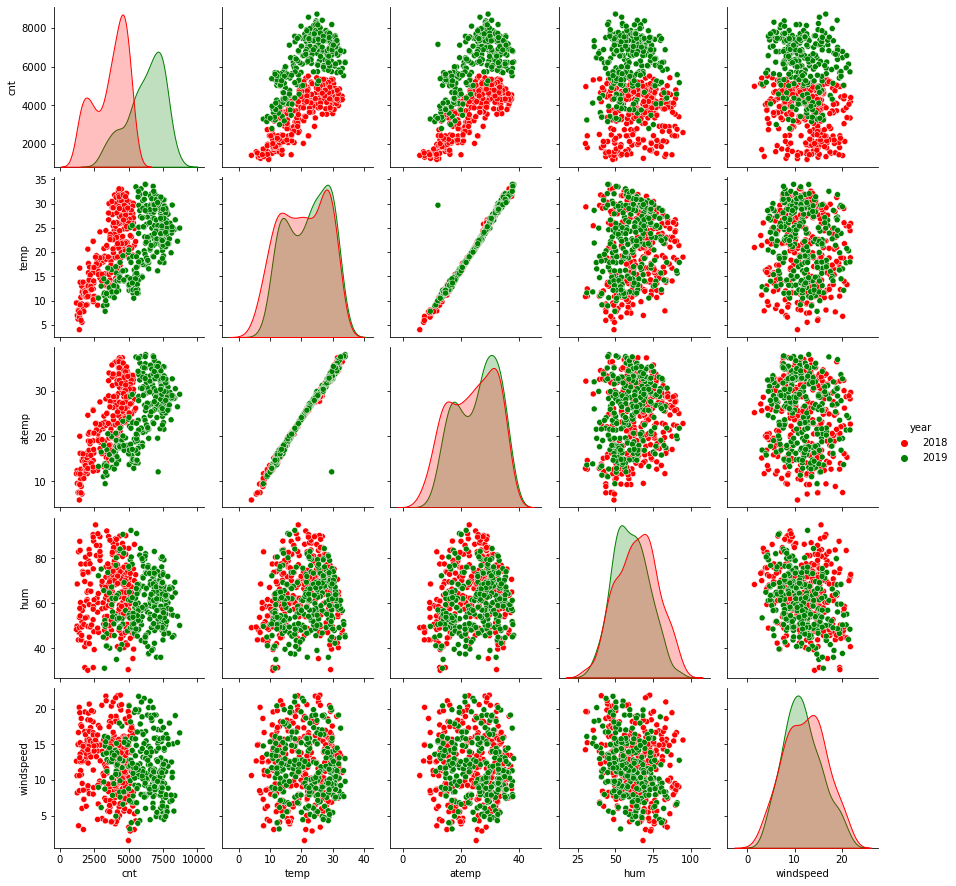

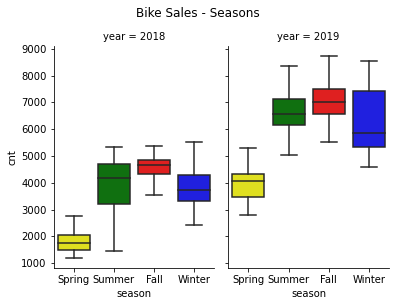

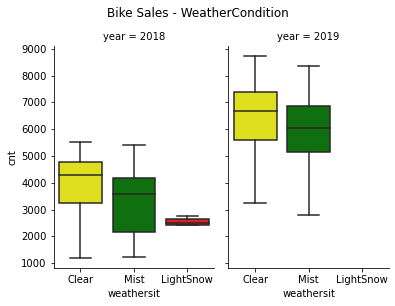

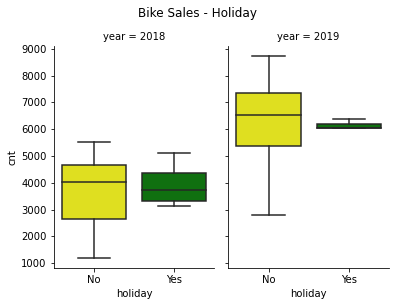

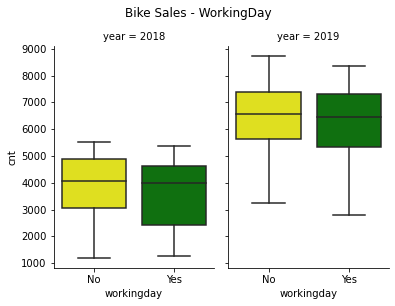

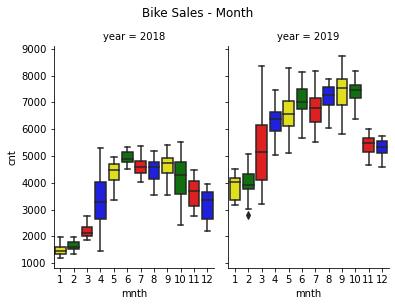

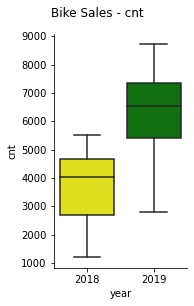

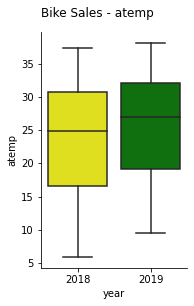

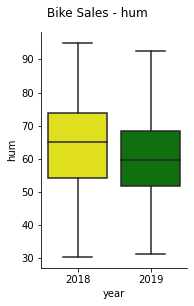

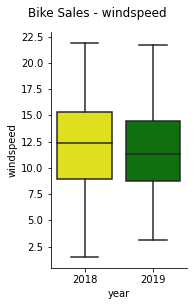

In [3]:
bikeds=bikeds[~(bikeds["cnt"]<1200)]
bikeds=bikeds[~((bikeds["cnt"]<1500)&(bikeds["year"]==2019))]
bikeds=bikeds[~(bikeds["hum"]<30)]
bikeds=bikeds[~(bikeds["windspeed"]>22)]
bikeds=bikeds[~((bikeds["cnt"]<2500)&(bikeds["year"]==2019)&(bikeds["weathersit"]==1))]
bikeds=bikeds[~((bikeds["cnt"]<5500)&(bikeds["year"]==2019)&(bikeds["holiday"]==1))]
bikeds=bikeds[~((bikeds["cnt"]>7000)&(bikeds["year"]==2019)&(bikeds["holiday"]==1))]
bikeds=bikeds[~((bikeds["cnt"]<5000)&(bikeds["year"]==2019)&(bikeds["season"]==2))]
bikeds=bikeds[~((bikeds["cnt"]>5500)&(bikeds["year"]==2019)&(bikeds["season"]==1))]
bikeds=bikeds[~((bikeds["cnt"]>2800)&(bikeds["year"]==2018)&(bikeds["season"]==1))]
bikeds=bikeds[~((bikeds["cnt"]<3500)&(bikeds["year"]==2018)&(bikeds["season"]==3))]
bikeds=bikeds[~((bikeds["cnt"]>5500)&(bikeds["year"]==2018)&(bikeds["season"]==3))]
bikeds=bikeds[~((bikeds["cnt"]<2000)&(bikeds["year"]==2018)&(bikeds["season"]==4))]
bikeds=bikeds[~((bikeds["cnt"]<2000)&(bikeds["year"]==2018)&(bikeds["weathersit"]==3))]
bikeds=bikeds[~((bikeds["cnt"]<2000)&(bikeds["year"]==2018)&(bikeds["holiday"]==1))]
bikeds=bikeds[~((bikeds["cnt"]<4500)&(bikeds["year"]==2019)&(bikeds["mnth"]==12))]
bikeds=bikeds[~((bikeds["cnt"]>6000)&(bikeds["year"]==2019)&(bikeds["mnth"]==12))]
bikeds=bikeds[~((bikeds["cnt"]<4500)&(bikeds["year"]==2019)&(bikeds["mnth"]==11))]
bikeds=bikeds[~((bikeds["cnt"]>6000)&(bikeds["year"]==2019)&(bikeds["mnth"]==11))]
bikeds=bikeds[~((bikeds["cnt"]<6000)&(bikeds["year"]==2019)&(bikeds["mnth"]==10))]
bikeds=bikeds[~((bikeds["cnt"]<3000)&(bikeds["year"]==2018)&(bikeds["mnth"]==9))]
bikeds=bikeds[~((bikeds["cnt"]<6000)&(bikeds["year"]==2019)&(bikeds["mnth"]==8))]
bikeds=bikeds[~((bikeds["cnt"]<5000)&(bikeds["year"]==2019)&(bikeds["mnth"]==7))]
bikeds=bikeds[~((bikeds["cnt"]<4000)&(bikeds["year"]==2018)&(bikeds["mnth"]==7))]
bikeds=bikeds[~((bikeds["cnt"]<5500)&(bikeds["year"]==2019)&(bikeds["mnth"]==6))]
bikeds=bikeds[~((bikeds["cnt"]<4500)&(bikeds["year"]==2018)&(bikeds["mnth"]==6))]
bikeds=bikeds[~((bikeds["cnt"]>5000)&(bikeds["year"]==2018)&(bikeds["mnth"]==5))]
bikeds=bikeds[~((bikeds["cnt"]<1800)&(bikeds["year"]==2018)&(bikeds["mnth"]==3))]
bikeds=bikeds[~((bikeds["cnt"]>2000)&(bikeds["year"]==2018)&(bikeds["mnth"]==2))]
bikeds=bikeds[~((bikeds["cnt"]<2500)&(bikeds["year"]==2019)&(bikeds["workingday"]==1))]
bikeds=bikeds[~((bikeds["cnt"]<3000)&(bikeds["year"]==2019)&(bikeds["workingday"]==0))]
#~((bikeds["year"]==2018) & (bikeds["hum"]<30))]

palette1 = sbn.color_palette(["red","green"])
sbn.pairplot(bikeds[varcon],hue="year",diag_kind = 'kde',palette=palette1)

palette = sbn.color_palette(["yellow","green","red","blue"])
row_name={0:2018,1:2019,2:2020,3:2021}

g1 = sbn.catplot(x="season", y="cnt", col="year",data=bikeds, kind="box",height=4, aspect=.7,palette=palette)
g1.set_xticklabels(["Spring","Summer","Fall","Winter"])
g1.fig.suptitle("Bike Sales - Seasons",y=1.05)

g2 = sbn.catplot(x="weathersit", y="cnt", col="year",data=bikeds, kind="box",height=4, aspect=.7,palette=palette)
g2.set_xticklabels(["Clear","Mist","LightSnow"])
g2.fig.suptitle("Bike Sales - WeatherCondition",y=1.05)

g3 = sbn.catplot(x="holiday", y="cnt", col="year",data=bikeds, kind="box",height=4, aspect=.7,palette=palette)
g3.set_xticklabels(["No","Yes"])
g3.fig.suptitle("Bike Sales - Holiday",y=1.05)

g4 = sbn.catplot(x="workingday", y="cnt", col="year",data=bikeds, kind="box",height=4, aspect=.7,palette=palette)
g4.set_xticklabels(["No","Yes"])
g4.fig.suptitle("Bike Sales - WorkingDay",y=1.05)

g5 = sbn.catplot(x="mnth", y="cnt", col="year",data=bikeds, kind="box",height=4, aspect=.7,palette=palette)
g5.fig.suptitle("Bike Sales - Month",y=1.05)

g6=sbn.catplot(x="year", y="cnt",data=bikeds, kind="box",height=4, aspect=.7,palette=palette)
g6.fig.suptitle("Bike Sales - cnt",y=1.05)

g7=sbn.catplot(x="year", y="atemp",data=bikeds, kind="box",height=4, aspect=.7,palette=palette)
g7.fig.suptitle("Bike Sales - atemp",y=1.05)

g8=sbn.catplot(x="year", y="hum",data=bikeds, kind="box",height=4, aspect=.7,palette=palette)
g8.fig.suptitle("Bike Sales - hum",y=1.05)

g9=sbn.catplot(x="year", y="windspeed",data=bikeds, kind="box",height=4, aspect=.7,palette=palette)
g9.fig.suptitle("Bike Sales - windspeed",y=1.05)

## Create dummy features for required categorical variables

In [4]:
season2=pd.get_dummies(bikeds["season"],drop_first=True).rename(columns={2:"summer",3:"fall",4:"winter"})
weather2=pd.get_dummies(bikeds["weathersit"],drop_first=True).rename(columns={2:"mist",3:"lightsnow"})
bikeds=pd.concat([bikeds,season2,weather2],axis=1)
bikeds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,year,summer,fall,winter,mist,lightsnow
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,16.636703,120,1229,1349,2018,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,10.739832,108,1454,1562,2018,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,12.522300,82,1518,1600,2018,0,0,0,0,0
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,...,6.000868,88,1518,1606,2018,0,0,0,0,0
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,...,11.304642,148,1362,1510,2018,0,0,0,1,0


## Select important Features:
    ### Drop low priority features such as dteday, instant, casual, registered
    ### Drop categorical features for which dummy freatures are created
    ### Group dataset based on year 2018 and 2019

In [5]:
vars2=['cnt','holiday','workingday', 'temp', 'atemp', 'hum', 'windspeed','summer', 'fall', 'winter','mist', 'lightsnow']
bikeds2018=bikeds[bikeds["year"]==2018][vars2]
bikeds2019=bikeds[bikeds["year"]==2019][vars2]

## Find Correlating Features

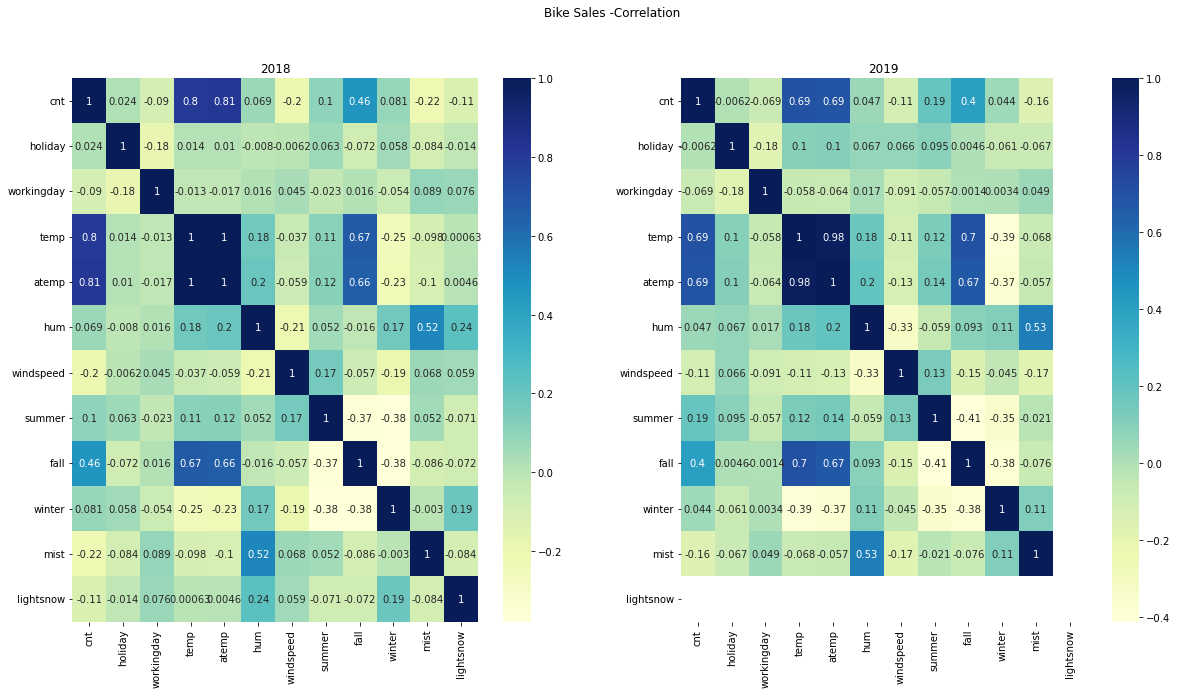

In [6]:
varcon2=['cnt','temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,10))
plt.suptitle("Bike Sales -Correlation")
plt.subplot(1,2,1)
sbn.heatmap(bikeds2018.corr(),annot=True,cmap="YlGnBu").set(title="2018")
plt.subplot(1,2,2)
sbn.heatmap(bikeds2019.corr(),annot=True,cmap="YlGnBu").set(title="2019")
plt.show()

## Eliminate Correlating Features: 

In [7]:
vifvars=['holiday','workingday', 'temp','atemp', 'hum', 'windspeed','summer', 'fall','winter','mist', 'lightsnow']
vifdata=bikeds[vifvars]

vifbike=pd.DataFrame()
vifbike["Features"]=vifdata.columns
vifbike["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifbike["VIF"]=round(vifbike["VIF"],2)
vifbike=vifbike.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifbike)
display(df1)

,Features,VIF
3,atemp,580.73
2,temp,537.50
4,hum,24.33
7,fall,7.82
5,windspeed,6.47
6,summer,4.41
1,workingday,3.52
8,winter,3.09
9,mist,2.06
0,holiday,1.07


## Eliminate Correlating Features: Dropped 'temp'

In [8]:
vifvars=['holiday','workingday','atemp', 'hum', 'windspeed','summer', 'fall','winter','mist', 'lightsnow']
vifdata=bikeds[vifvars]

vifbike=pd.DataFrame()
vifbike["Features"]=vifdata.columns
vifbike["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifbike["VIF"]=round(vifbike["VIF"],2)
vifbike=vifbike.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifbike)
display(df1)

,Features,VIF
2,atemp,33.97
3,hum,23.16
6,fall,7.27
4,windspeed,6.47
5,summer,4.34
1,workingday,3.52
7,winter,3.09
8,mist,2.04
0,holiday,1.07
9,lightsnow,1.06


## Eliminate Correlating Features: Dropped 'hum'

In [9]:
vifvars=['holiday','workingday','atemp', 'windspeed','summer', 'fall','winter','mist', 'lightsnow']
vifdata=bikeds[vifvars]

vifbike=pd.DataFrame()
vifbike["Features"]=vifdata.columns
vifbike["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifbike["VIF"]=round(vifbike["VIF"],2)
vifbike=vifbike.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifbike)
display(df1)

,Features,VIF
2,atemp,20.55
5,fall,6.89
3,windspeed,6.01
4,summer,4.27
1,workingday,3.36
6,winter,3.01
7,mist,1.45
0,holiday,1.06
8,lightsnow,1.04


## Eliminate Correlating Features: Dropped 'fall'

In [10]:
vifvars=['holiday','workingday','atemp', 'windspeed','summer', 'winter','mist', 'lightsnow']
vifdata=bikeds[vifvars]

vifbike=pd.DataFrame()
vifbike["Features"]=vifdata.columns
vifbike["VIF"]=[variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vifbike["VIF"]=round(vifbike["VIF"],2)
vifbike=vifbike.sort_values(by="VIF",ascending=False)
df1=pd.DataFrame(vifbike)
display(df1)

,Features,VIF
2,atemp,5.72
3,windspeed,5.71
1,workingday,3.32
4,summer,1.61
5,winter,1.46
6,mist,1.45
0,holiday,1.06
7,lightsnow,1.04


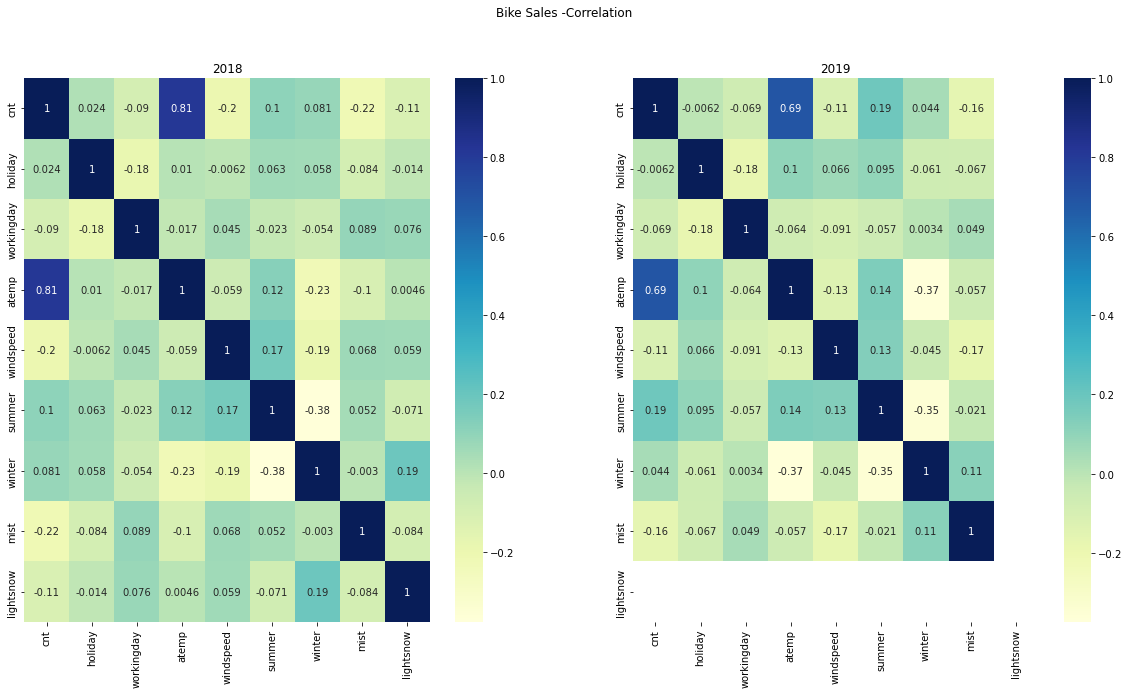

In [11]:
vars2=['cnt','holiday','workingday','atemp', 'windspeed','summer', 'winter','mist', 'lightsnow']
bikeds2018=bikeds[bikeds["year"]==2018][vars2]
bikeds2019=bikeds[bikeds["year"]==2019][vars2]

plt.figure(figsize=(20,10))
plt.suptitle("Bike Sales -Correlation")
plt.subplot(1,2,1)
sbn.heatmap(bikeds2018.corr(),annot=True,cmap="YlGnBu").set(title="2018")
plt.subplot(1,2,2)
sbn.heatmap(bikeds2019.corr(),annot=True,cmap="YlGnBu").set(title="2019")
plt.show()

## Estimate Model : Run-1
    ### Output : cnt
    ### Input : holiday','workingday','atemp', 'windspeed','summer', 'winter','mist', 'lightsnow'
    ### Models for year 2018 and year 2019 are estimated separately

In [12]:
vars3=['cnt','holiday','workingday','atemp', 'windspeed','summer', 'winter','mist', 'lightsnow']
varcon3=['cnt','atemp', 'windspeed']
bikeds2018=bikeds[bikeds["year"]==2018][vars3]
bikeds2019=bikeds[bikeds["year"]==2019][vars3]

bike2018_train, bike2018_test=train_test_split(bikeds2018,train_size=.7,random_state=100)
bike2019_train, bike2019_test=train_test_split(bikeds2019,train_size=.7,random_state=100)

scaler2018=MinMaxScaler()
scaler2019=MinMaxScaler()

bike2018_train[varcon3]=scaler2018.fit_transform(bike2018_train[varcon3])
bike2019_train[varcon3]=scaler2019.fit_transform(bike2019_train[varcon3])

ybike2018_train=bike2018_train.pop("cnt")
ybike2019_train=bike2019_train.pop("cnt")

xbike2018_train=bike2018_train
xbike2019_train=bike2019_train

xbike2018_train_sm=sm.add_constant(xbike2018_train)
xbike2019_train_sm=sm.add_constant(xbike2019_train)

lrbike2018=sm.OLS(ybike2018_train,xbike2018_train_sm)
lrbike2019=sm.OLS(ybike2019_train,xbike2019_train_sm)

bikemodel2018=lrbike2018.fit()
bikemodel2019=lrbike2019.fit()

print("Model Summary-2018\n",bikemodel2018.summary(),"\n\nModel Summary-2019\n",bikemodel2019.summary())

Model Summary-2018
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.85e-66
Time:                        18:14:38   Log-Likelihood:                 127.26
No. Observations:                 202   AIC:                            -236.5
Df Residuals:                     193   BIC:                            -206.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0517      0.040

## Estimate the VIF for both the year

In [13]:
vifdata1=xbike2018_train
vifdata2=xbike2019_train

vifbike2018=pd.DataFrame()
vifbike2019=pd.DataFrame()
vifbike2018["Features"]=vifdata1.columns
vifbike2019["Features"]=vifdata2.columns
vifbike2018["VIF"]=[variance_inflation_factor(vifdata1.values, i) for i in range(vifdata1.shape[1])]
vifbike2019["VIF"]=[variance_inflation_factor(vifdata2.values, i) for i in range(vifdata2.shape[1])]
vifbike2018["VIF"]=round(vifbike2018["VIF"],2)
vifbike2019["VIF"]=round(vifbike2019["VIF"],2)
vifbike2018=vifbike2018.sort_values(by="VIF",ascending=False)
vifbike2019=vifbike2019.sort_values(by="VIF",ascending=False)

df1=pd.DataFrame(vifbike2018)
df2=pd.DataFrame(vifbike2019)
df3=pd.concat([df1,df2],axis=1)

print("\tVIF-2018\tVIF-2019")
display(df3)

	VIF-2018	VIF-2019


,Features,VIF,Features,VIF
0,holiday,1.07,holiday,1.06
1,workingday,2.91,workingday,3.09
2,atemp,4.19,atemp,3.81
3,windspeed,4.97,windspeed,3.32
4,summer,1.67,summer,1.59
5,winter,1.45,winter,1.28
6,mist,1.58,mist,1.37
7,lightsnow,1.12,lightsnow,NaN


## Estimate RFE for both the years

In [14]:
sklr2018=LinearRegression()
sklr2019=LinearRegression()

sklr2018.fit(xbike2018_train_sm,ybike2018_train)
sklr2019.fit(xbike2019_train_sm,ybike2019_train)

rfe2018=RFE(sklr2018,6)
rfe2019=RFE(sklr2019,6)

rfe2018.fit(xbike2018_train_sm,ybike2018_train)
rfe2019.fit(xbike2019_train_sm,ybike2019_train)

df1=pd.DataFrame(list(zip(xbike2018_train_sm.columns,rfe2018.ranking_,rfe2018.support_)))
df2=pd.DataFrame(list(zip(xbike2019_train_sm.columns,rfe2019.ranking_,rfe2019.support_)))
df3=pd.concat([df1,df2],axis=1)
print("\tRFE-2018\tRFE-2019")
display(df3)

	RFE-2018	RFE-2019


,0,1,2,0,1,2
0,const,4,False,const,4,False
1,holiday,1,True,holiday,1,True
2,workingday,3,False,workingday,2,False
3,atemp,1,True,atemp,1,True
4,windspeed,1,True,windspeed,1,True
5,summer,1,True,summer,1,True
6,winter,1,True,winter,1,True
7,mist,2,False,mist,1,True
8,lightsnow,1,True,lightsnow,3,False


## Plot the Trained Model

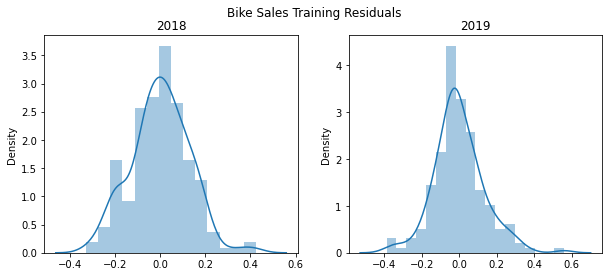

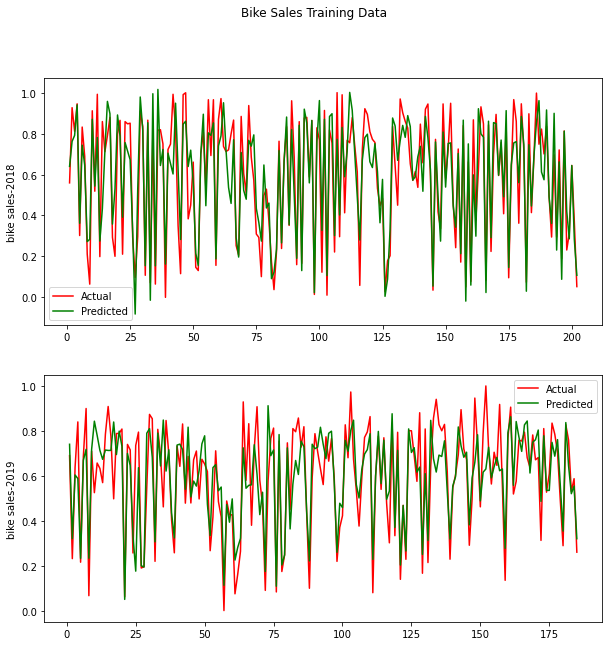

In [15]:
ybike2018_train_pred=bikemodel2018.predict(xbike2018_train_sm)
ybike2019_train_pred=bikemodel2019.predict(xbike2019_train_sm)

ybike2018_train_res=ybike2018_train-ybike2018_train_pred
ybike2019_train_res=ybike2019_train-ybike2019_train_pred

x1=range(1,len(ybike2018_train)+1)
x2=range(1,len(ybike2019_train)+1)

plt.figure(figsize=(10,4))
plt.suptitle("Bike Sales Training Residuals")
plt.subplot(1,2,1)
sbn.distplot(ybike2018_train_res).set(title="2018")
plt.subplot(1,2,2)
sbn.distplot(ybike2019_train_res).set(title="2019")

plt.figure(figsize=(10,10))
plt.suptitle("Bike Sales Training Data")
plt.subplot(2,1,1)
plt.plot(x1,ybike2018_train,c="red",label="Actual")
plt.plot(x1,ybike2018_train_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2018")
plt.legend()
plt.subplot(2,1,2)
plt.plot(x2,ybike2019_train,c="red",label="Actual")
plt.plot(x2,ybike2019_train_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2019")
plt.legend()
#plt.scatter(x,ybike2019_train_pred,c="yellow")

## Find the Prediction & R2 Score on Test data

In [16]:
bike2018_test[varcon3]=scaler2018.transform(bike2018_test[varcon3])
bike2019_test[varcon3]=scaler2019.transform(bike2019_test[varcon3])

ybike2018_test=bike2018_test.pop("cnt")
ybike2019_test=bike2019_test.pop("cnt")

xbike2018_test=bike2018_test
xbike2019_test=bike2019_test

xbike2018_test_sm=sm.add_constant(xbike2018_test)
xbike2019_test_sm=sm.add_constant(xbike2019_test)

ybike2018_test_pred=bikemodel2018.predict(xbike2018_test_sm)
ybike2019_test_pred=bikemodel2019.predict(xbike2019_test_sm)

a=r2_score(y_true=ybike2018_test,y_pred=ybike2018_test_pred)
b=r2_score(y_true=ybike2019_test,y_pred=ybike2019_test_pred)
print("\tR2 Score-2018\t",round(a,2),"\n","\tR2-Score-2019\t",round(b,2))
#ybike2018_test

	R2 Score-2018	 0.78 
 	R2-Score-2019	 0.57


## Plot the test prediction

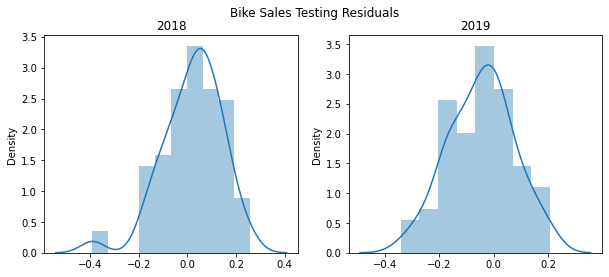

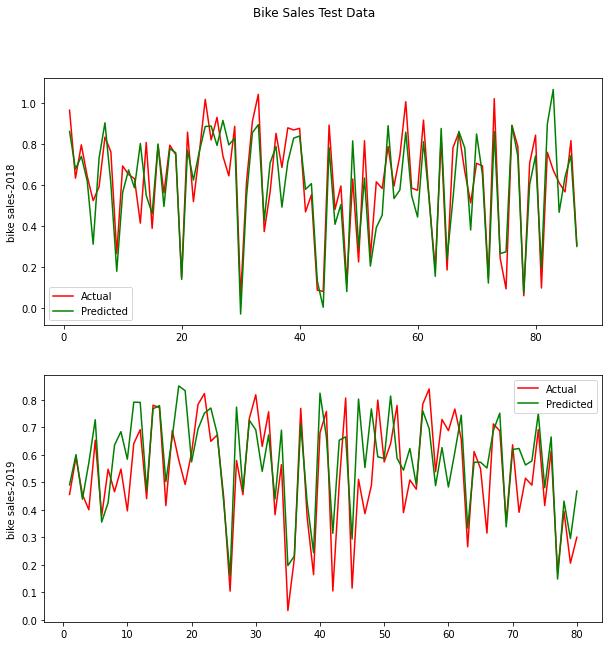

In [17]:
ybike2018_test_res=ybike2018_test-ybike2018_test_pred
ybike2019_test_res=ybike2019_test-ybike2019_test_pred

x1=range(1,len(ybike2018_test)+1)
x2=range(1,len(ybike2019_test)+1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.suptitle("Bike Sales Testing Residuals")
sbn.distplot(ybike2018_test_res).set(title="2018")
plt.subplot(1,2,2)
sbn.distplot(ybike2019_test_res).set(title="2019")

plt.figure(figsize=(10,10))
plt.suptitle("Bike Sales Test Data")
plt.subplot(2,1,1)
plt.plot(x1,ybike2018_test,c="red",label="Actual")
plt.plot(x1,ybike2018_test_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2018")
plt.legend()
plt.subplot(2,1,2)
plt.plot(x2,ybike2019_test,c="red",label="Actual")
plt.plot(x2,ybike2019_test_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2019")
plt.legend()

## Estimate Model : Run-2
    ### Output : cnt
    ### Input : holiday','atemp', 'windspeed','summer', 'winter','mist'
    ### Models for year 2018 and year 2019 are estimated separately

In [18]:
vars3=['cnt','holiday','atemp', 'windspeed','summer', 'winter','mist']
varcon3=['cnt','atemp', 'windspeed']

bikeds2018=bikeds[bikeds["year"]==2018][vars3]
bikeds2019=bikeds[bikeds["year"]==2019][vars3]

bike2018_train, bike2018_test=train_test_split(bikeds2018,train_size=.7,random_state=100)
bike2019_train, bike2019_test=train_test_split(bikeds2019,train_size=.7,random_state=100)

scaler2018=MinMaxScaler()
scaler2019=MinMaxScaler()

bike2018_train[varcon3]=scaler2018.fit_transform(bike2018_train[varcon3])
bike2019_train[varcon3]=scaler2019.fit_transform(bike2019_train[varcon3])

ybike2018_train=bike2018_train.pop("cnt")
ybike2019_train=bike2019_train.pop("cnt")

xbike2018_train=bike2018_train
xbike2019_train=bike2019_train

xbike2018_train_sm=sm.add_constant(xbike2018_train)
xbike2019_train_sm=sm.add_constant(xbike2019_train)

lrbike2018=sm.OLS(ybike2018_train,xbike2018_train_sm)
lrbike2019=sm.OLS(ybike2019_train,xbike2019_train_sm)

bikemodel2018=lrbike2018.fit()
bikemodel2019=lrbike2019.fit()

print("Model Summary-2018\n",bikemodel2018.summary(),"\n\nModel Summary-2019\n",bikemodel2019.summary())

Model Summary-2018
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           7.35e-61
Time:                        18:14:47   Log-Likelihood:                 109.12
No. Observations:                 202   AIC:                            -204.2
Df Residuals:                     195   BIC:                            -181.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0667      0.040

## Estimate the VIF for both the year

In [19]:
vifdata1=xbike2018_train
vifdata2=xbike2019_train

vifbike2018=pd.DataFrame()
vifbike2019=pd.DataFrame()
vifbike2018["Features"]=vifdata1.columns
vifbike2019["Features"]=vifdata2.columns
vifbike2018["VIF"]=[variance_inflation_factor(vifdata1.values, i) for i in range(vifdata1.shape[1])]
vifbike2019["VIF"]=[variance_inflation_factor(vifdata2.values, i) for i in range(vifdata2.shape[1])]
vifbike2018["VIF"]=round(vifbike2018["VIF"],2)
vifbike2019["VIF"]=round(vifbike2019["VIF"],2)
vifbike2018=vifbike2018.sort_values(by="VIF",ascending=False)
vifbike2019=vifbike2019.sort_values(by="VIF",ascending=False)

df1=pd.DataFrame(vifbike2018)
df2=pd.DataFrame(vifbike2019)
df3=pd.concat([df1,df2],axis=1)

print("\tVIF-2018\tVIF-2019")
display(df3)

	VIF-2018	VIF-2019


,Features,VIF,Features,VIF
0,holiday,1.05,holiday,1.03
1,atemp,3.77,atemp,3.05
2,windspeed,4.53,windspeed,3.04
3,summer,1.67,summer,1.59
4,winter,1.35,winter,1.27
5,mist,1.52,mist,1.32


## Estimate RFE for both the years

In [20]:
sklr2018=LinearRegression()
sklr2019=LinearRegression()

sklr2018.fit(xbike2018_train_sm,ybike2018_train)
sklr2019.fit(xbike2019_train_sm,ybike2019_train)

rfe2018=RFE(sklr2018,6)
rfe2019=RFE(sklr2019,6)

rfe2018.fit(xbike2018_train_sm,ybike2018_train)
rfe2019.fit(xbike2019_train_sm,ybike2019_train)

df1=pd.DataFrame(list(zip(xbike2018_train_sm.columns,rfe2018.ranking_,rfe2018.support_)))
df2=pd.DataFrame(list(zip(xbike2019_train_sm.columns,rfe2019.ranking_,rfe2019.support_)))
df3=pd.concat([df1,df2],axis=1)
print("\tRFE-2018\tRFE-2019")
display(df3)

	RFE-2018	RFE-2019


,0,1,2,0,1,2
0,const,2,False,const,2,False
1,holiday,1,True,holiday,1,True
2,atemp,1,True,atemp,1,True
3,windspeed,1,True,windspeed,1,True
4,summer,1,True,summer,1,True
5,winter,1,True,winter,1,True
6,mist,1,True,mist,1,True


## Plot the Trained Model

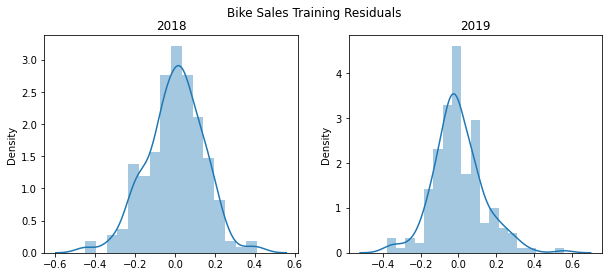

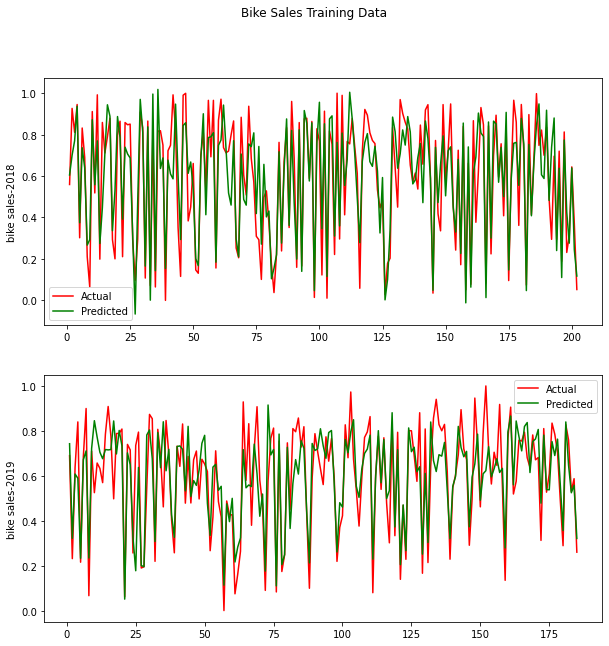

In [21]:
ybike2018_train_pred=bikemodel2018.predict(xbike2018_train_sm)
ybike2019_train_pred=bikemodel2019.predict(xbike2019_train_sm)

ybike2018_train_res=ybike2018_train-ybike2018_train_pred
ybike2019_train_res=ybike2019_train-ybike2019_train_pred

x1=range(1,len(ybike2018_train)+1)
x2=range(1,len(ybike2019_train)+1)

plt.figure(figsize=(10,4))
plt.suptitle("Bike Sales Training Residuals")
plt.subplot(1,2,1)
sbn.distplot(ybike2018_train_res).set(title="2018")
plt.subplot(1,2,2)
sbn.distplot(ybike2019_train_res).set(title="2019")

plt.figure(figsize=(10,10))
plt.suptitle("Bike Sales Training Data")
plt.subplot(2,1,1)
plt.plot(x1,ybike2018_train,c="red",label="Actual")
plt.plot(x1,ybike2018_train_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2018")
plt.legend()
plt.subplot(2,1,2)
plt.plot(x2,ybike2019_train,c="red",label="Actual")
plt.plot(x2,ybike2019_train_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2019")
plt.legend()

## Find the Prediction & R2 Score on Test data

In [22]:
bike2018_test[varcon3]=scaler2018.transform(bike2018_test[varcon3])
bike2019_test[varcon3]=scaler2019.transform(bike2019_test[varcon3])

ybike2018_test=bike2018_test.pop("cnt")
ybike2019_test=bike2019_test.pop("cnt")

xbike2018_test=bike2018_test
xbike2019_test=bike2019_test

xbike2018_test_sm=sm.add_constant(xbike2018_test)
xbike2019_test_sm=sm.add_constant(xbike2019_test)

ybike2018_test_pred=bikemodel2018.predict(xbike2018_test_sm)
ybike2019_test_pred=bikemodel2019.predict(xbike2019_test_sm)

a=r2_score(y_true=ybike2018_test,y_pred=ybike2018_test_pred)
b=r2_score(y_true=ybike2019_test,y_pred=ybike2019_test_pred)
print("\tR2 Score-2018\t",round(a,2),"\n","\tR2-Score-2019\t",round(b,2))

	R2 Score-2018	 0.76 
 	R2-Score-2019	 0.57


## Plot the test prediction

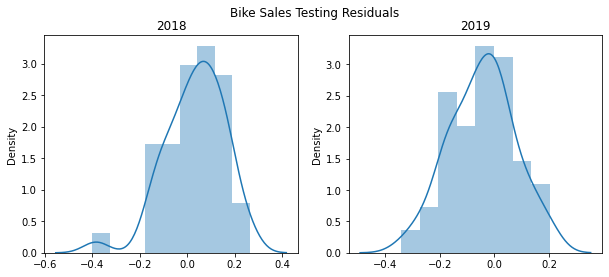

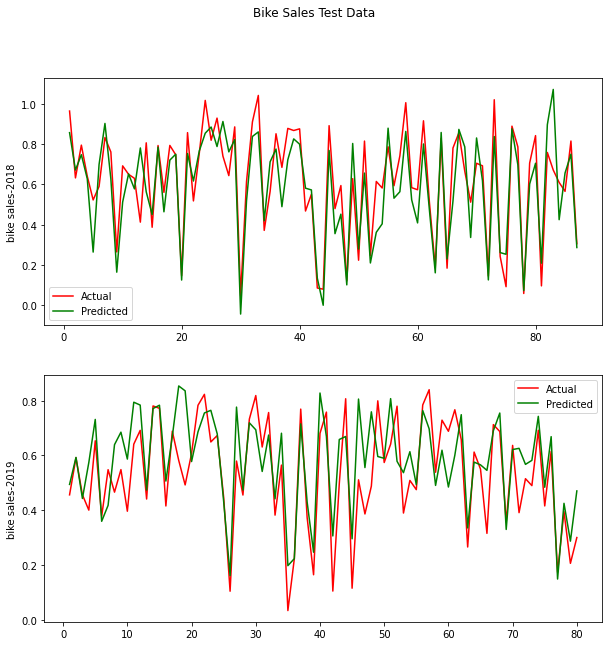

In [23]:
ybike2018_test_res=ybike2018_test-ybike2018_test_pred
ybike2019_test_res=ybike2019_test-ybike2019_test_pred

x1=range(1,len(ybike2018_test)+1)
x2=range(1,len(ybike2019_test)+1)

plt.figure(figsize=(10,4))
plt.suptitle("Bike Sales Testing Residuals")
plt.subplot(1,2,1)
sbn.distplot(ybike2018_test_res).set(title="2018")
plt.subplot(1,2,2)
sbn.distplot(ybike2019_test_res).set(title="2019")

plt.figure(figsize=(10,10))
plt.suptitle("Bike Sales Test Data")
plt.subplot(2,1,1)
plt.plot(x1,ybike2018_test,c="red",label="Actual")
plt.plot(x1,ybike2018_test_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2018")
plt.legend()
plt.subplot(2,1,2)
plt.plot(x2,ybike2019_test,c="red",label="Actual")
plt.plot(x2,ybike2019_test_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2019")
plt.legend()

## Estimate Model : Run-3
    ### Output : cnt
    ### Input : 'atemp', 'windspeed','summer', 'winter','mist'
    ### Models for year 2018 and year 2019 are estimated separately

In [24]:
vars3=['cnt','atemp', 'windspeed','summer', 'winter','mist']
varcon3=['cnt','atemp', 'windspeed']
       
bikeds2018=bikeds[bikeds["year"]==2018][vars3]
bikeds2019=bikeds[bikeds["year"]==2019][vars3]

bike2018_train, bike2018_test=train_test_split(bikeds2018,train_size=.7,random_state=100)
bike2019_train, bike2019_test=train_test_split(bikeds2019,train_size=.7,random_state=100)

scaler2018=MinMaxScaler()
scaler2019=MinMaxScaler()

bike2018_train[varcon3]=scaler2018.fit_transform(bike2018_train[varcon3])
bike2019_train[varcon3]=scaler2019.fit_transform(bike2019_train[varcon3])

ybike2018_train=bike2018_train.pop("cnt")
ybike2019_train=bike2019_train.pop("cnt")

xbike2018_train=bike2018_train
xbike2019_train=bike2019_train

xbike2018_train_sm=sm.add_constant(xbike2018_train)
xbike2019_train_sm=sm.add_constant(xbike2019_train)

lrbike2018=sm.OLS(ybike2018_train,xbike2018_train_sm)
lrbike2019=sm.OLS(ybike2019_train,xbike2019_train_sm)

bikemodel2018=lrbike2018.fit()
bikemodel2019=lrbike2019.fit()

print("Model Summary-2018\n",bikemodel2018.summary(),"\n\nModel Summary-2019\n",bikemodel2019.summary())

Model Summary-2018
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     135.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.33e-61
Time:                        18:15:14   Log-Likelihood:                 108.29
No. Observations:                 202   AIC:                            -204.6
Df Residuals:                     196   BIC:                            -184.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0645      0.040

## Estimate the VIF for both the year

In [25]:
vifdata1=xbike2018_train
vifdata2=xbike2019_train

vifbike2018=pd.DataFrame()
vifbike2019=pd.DataFrame()
vifbike2018["Features"]=vifdata1.columns
vifbike2019["Features"]=vifdata2.columns
vifbike2018["VIF"]=[variance_inflation_factor(vifdata1.values, i) for i in range(vifdata1.shape[1])]
vifbike2019["VIF"]=[variance_inflation_factor(vifdata2.values, i) for i in range(vifdata2.shape[1])]
vifbike2018["VIF"]=round(vifbike2018["VIF"],2)
vifbike2019["VIF"]=round(vifbike2019["VIF"],2)
vifbike2018=vifbike2018.sort_values(by="VIF",ascending=False)
vifbike2019=vifbike2019.sort_values(by="VIF",ascending=False)

df1=pd.DataFrame(vifbike2018)
df2=pd.DataFrame(vifbike2019)
df3=pd.concat([df1,df2],axis=1)

print("\tVIF-2018\tVIF-2019")
display(df3)

	VIF-2018	VIF-2019


,Features,VIF,Features,VIF
0,atemp,3.74,atemp,3.04
1,windspeed,4.50,windspeed,3.03
2,summer,1.64,summer,1.59
3,winter,1.34,winter,1.26
4,mist,1.51,mist,1.32


## Estimate RFE for both the years

In [26]:
sklr2018=LinearRegression()
sklr2019=LinearRegression()

sklr2018.fit(xbike2018_train_sm,ybike2018_train)
sklr2019.fit(xbike2019_train_sm,ybike2019_train)

rfe2018=RFE(sklr2018,6)
rfe2019=RFE(sklr2019,6)

rfe2018.fit(xbike2018_train_sm,ybike2018_train)
rfe2019.fit(xbike2019_train_sm,ybike2019_train)

df1=pd.DataFrame(list(zip(xbike2018_train_sm.columns,rfe2018.ranking_,rfe2018.support_)))
df2=pd.DataFrame(list(zip(xbike2019_train_sm.columns,rfe2019.ranking_,rfe2019.support_)))
df3=pd.concat([df1,df2],axis=1)
print("\tRFE-2018\tRFE-2019")
display(df3)

	RFE-2018	RFE-2019


,0,1,2,0,1,2
0,const,1,True,const,1,True
1,atemp,1,True,atemp,1,True
2,windspeed,1,True,windspeed,1,True
3,summer,1,True,summer,1,True
4,winter,1,True,winter,1,True
5,mist,1,True,mist,1,True


## Plot the Trained Model

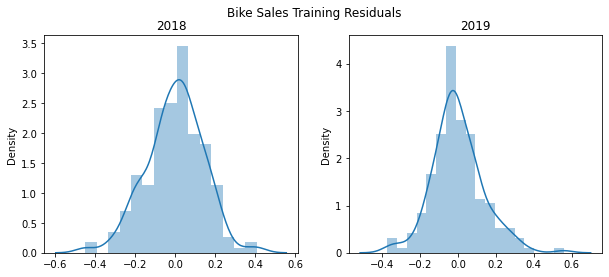

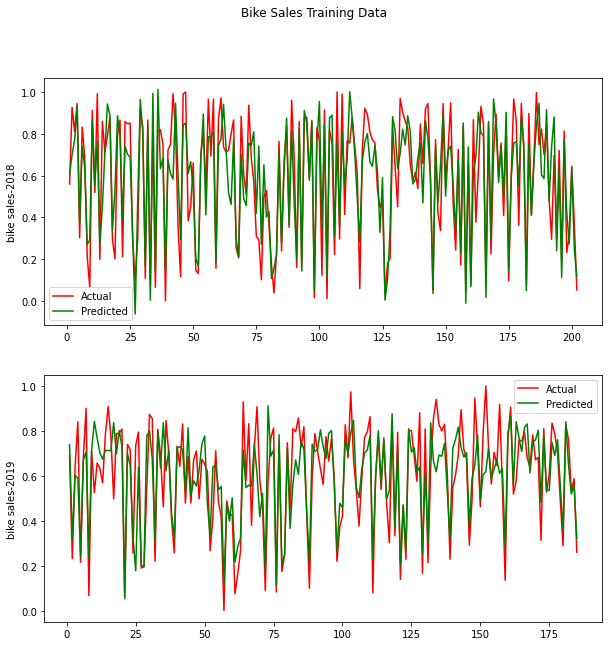

In [27]:
ybike2018_train_pred=bikemodel2018.predict(xbike2018_train_sm)
ybike2019_train_pred=bikemodel2019.predict(xbike2019_train_sm)

ybike2018_train_res=ybike2018_train-ybike2018_train_pred
ybike2019_train_res=ybike2019_train-ybike2019_train_pred

x1=range(1,len(ybike2018_train)+1)
x2=range(1,len(ybike2019_train)+1)

plt.figure(figsize=(10,4))
plt.suptitle("Bike Sales Training Residuals")
plt.subplot(1,2,1)
sbn.distplot(ybike2018_train_res).set(title="2018")
plt.subplot(1,2,2)
sbn.distplot(ybike2019_train_res).set(title="2019")

plt.figure(figsize=(10,10))
plt.suptitle("Bike Sales Training Data")
plt.subplot(2,1,1)
plt.plot(x1,ybike2018_train,c="red",label="Actual")
plt.plot(x1,ybike2018_train_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2018")
plt.legend()
plt.subplot(2,1,2)
plt.plot(x2,ybike2019_train,c="red",label="Actual")
plt.plot(x2,ybike2019_train_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2019")
plt.legend()

## Find the Prediction & R2 Score on Test data

In [28]:
bike2018_test[varcon3]=scaler2018.transform(bike2018_test[varcon3])
bike2019_test[varcon3]=scaler2019.transform(bike2019_test[varcon3])

ybike2018_test=bike2018_test.pop("cnt")
ybike2019_test=bike2019_test.pop("cnt")

xbike2018_test=bike2018_test
xbike2019_test=bike2019_test

xbike2018_test_sm=sm.add_constant(xbike2018_test)
xbike2019_test_sm=sm.add_constant(xbike2019_test)

ybike2018_test_pred=bikemodel2018.predict(xbike2018_test_sm)
ybike2019_test_pred=bikemodel2019.predict(xbike2019_test_sm)

a=r2_score(y_true=ybike2018_test,y_pred=ybike2018_test_pred)
b=r2_score(y_true=ybike2019_test,y_pred=ybike2019_test_pred)
print("\tR2 Score-2018\t",round(a,2),"\n","\tR2-Score-2019\t",round(b,2))

	R2 Score-2018	 0.76 
 	R2-Score-2019	 0.55


## Plot the test prediction

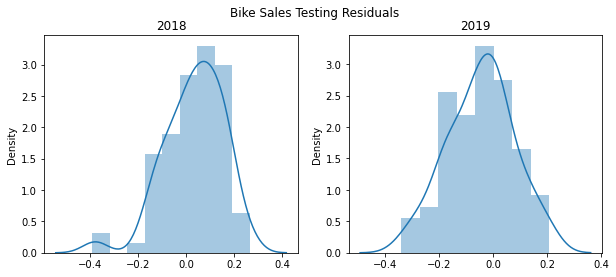

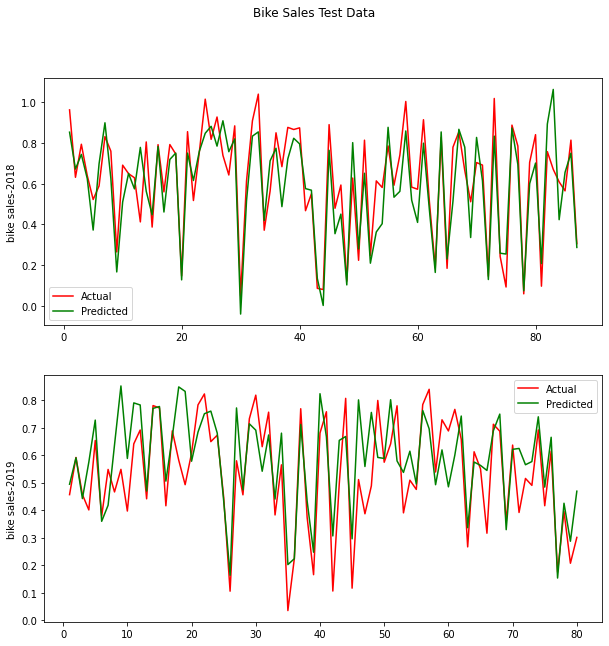

In [29]:
ybike2018_test_res=ybike2018_test-ybike2018_test_pred
ybike2019_test_res=ybike2019_test-ybike2019_test_pred

x1=range(1,len(ybike2018_test)+1)
x2=range(1,len(ybike2019_test)+1)

plt.figure(figsize=(10,4))
plt.suptitle("Bike Sales Testing Residuals")
plt.subplot(1,2,1)
sbn.distplot(ybike2018_test_res).set(title="2018")
plt.subplot(1,2,2)
sbn.distplot(ybike2019_test_res).set(title="2019")

plt.figure(figsize=(10,10))
plt.suptitle("Bike Sales Test Data")
plt.subplot(2,1,1)
plt.plot(x1,ybike2018_test,c="red",label="Actual")
plt.plot(x1,ybike2018_test_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2018")
plt.legend()
plt.subplot(2,1,2)
plt.plot(x2,ybike2019_test,c="red",label="Actual")
plt.plot(x2,ybike2019_test_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2019")
plt.legend()

## Estimate Model : Run-4
    ### Output : cnt
    ### Input : 'atemp','summer', 'winter','mist'
    ### Models for year 2018 and year 2019 are estimated separately

In [30]:
vars3=['cnt','atemp','summer', 'winter','mist']
varcon3=['cnt','atemp']

bikeds2018=bikeds[bikeds["year"]==2018][vars3]
bikeds2019=bikeds[bikeds["year"]==2019][vars3]

bike2018_train, bike2018_test=train_test_split(bikeds2018,train_size=.7,random_state=100)
bike2019_train, bike2019_test=train_test_split(bikeds2019,train_size=.7,random_state=100)

scaler2018=MinMaxScaler()
scaler2019=MinMaxScaler()

bike2018_train[varcon3]=scaler2018.fit_transform(bike2018_train[varcon3])
bike2019_train[varcon3]=scaler2019.fit_transform(bike2019_train[varcon3])

ybike2018_train=bike2018_train.pop("cnt")
ybike2019_train=bike2019_train.pop("cnt")

xbike2018_train=bike2018_train
xbike2019_train=bike2019_train

xbike2018_train_sm=sm.add_constant(xbike2018_train)
xbike2019_train_sm=sm.add_constant(xbike2019_train)

lrbike2018=sm.OLS(ybike2018_train,xbike2018_train_sm)
lrbike2019=sm.OLS(ybike2019_train,xbike2019_train_sm)

bikemodel2018=lrbike2018.fit()
bikemodel2019=lrbike2019.fit()

print("Model Summary-2018\n",bikemodel2018.summary(),"\n\nModel Summary-2019\n",bikemodel2019.summary())

Model Summary-2018
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     157.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           3.84e-60
Time:                        18:15:24   Log-Likelihood:                 102.13
No. Observations:                 202   AIC:                            -194.3
Df Residuals:                     197   BIC:                            -177.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0209      0.032

## Estimate the VIF for both the year

In [31]:
vifdata1=xbike2018_train
vifdata2=xbike2019_train

vifbike2018=pd.DataFrame()
vifbike2019=pd.DataFrame()
vifbike2018["Features"]=vifdata1.columns
vifbike2019["Features"]=vifdata2.columns
vifbike2018["VIF"]=[variance_inflation_factor(vifdata1.values, i) for i in range(vifdata1.shape[1])]
vifbike2019["VIF"]=[variance_inflation_factor(vifdata2.values, i) for i in range(vifdata2.shape[1])]
vifbike2018["VIF"]=round(vifbike2018["VIF"],2)
vifbike2019["VIF"]=round(vifbike2019["VIF"],2)
vifbike2018=vifbike2018.sort_values(by="VIF",ascending=False)
vifbike2019=vifbike2019.sort_values(by="VIF",ascending=False)

df1=pd.DataFrame(vifbike2018)
df2=pd.DataFrame(vifbike2019)
df3=pd.concat([df1,df2],axis=1)

print("\tVIF-2018\tVIF-2019")
display(df3)

	VIF-2018	VIF-2019


,Features,VIF,Features,VIF
0,atemp,1.88,atemp,1.71
1,summer,1.55,summer,1.47
3,mist,1.32,mist,1.32
2,winter,1.30,winter,1.22


## Estimate RFE for both the years

In [32]:
sklr2018=LinearRegression()
sklr2019=LinearRegression()

sklr2018.fit(xbike2018_train_sm,ybike2018_train)
sklr2019.fit(xbike2019_train_sm,ybike2019_train)

rfe2018=RFE(sklr2018,6)
rfe2019=RFE(sklr2019,6)

rfe2018.fit(xbike2018_train_sm,ybike2018_train)
rfe2019.fit(xbike2019_train_sm,ybike2019_train)

df1=pd.DataFrame(list(zip(xbike2018_train_sm.columns,rfe2018.ranking_,rfe2018.support_)))
df2=pd.DataFrame(list(zip(xbike2019_train_sm.columns,rfe2019.ranking_,rfe2019.support_)))
df3=pd.concat([df1,df2],axis=1)
print("\tRFE-2018\tRFE-2019")
display(df3)

	RFE-2018	RFE-2019


,0,1,2,0,1,2
0,const,1,True,const,1,True
1,atemp,1,True,atemp,1,True
2,summer,1,True,summer,1,True
3,winter,1,True,winter,1,True
4,mist,1,True,mist,1,True


## Plot the Trained Model

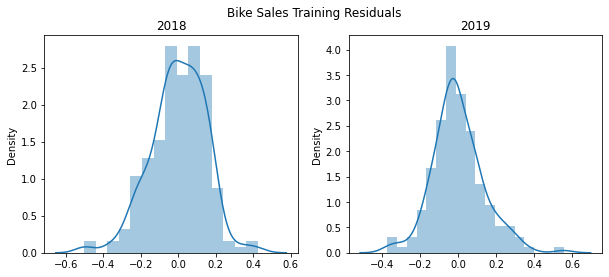

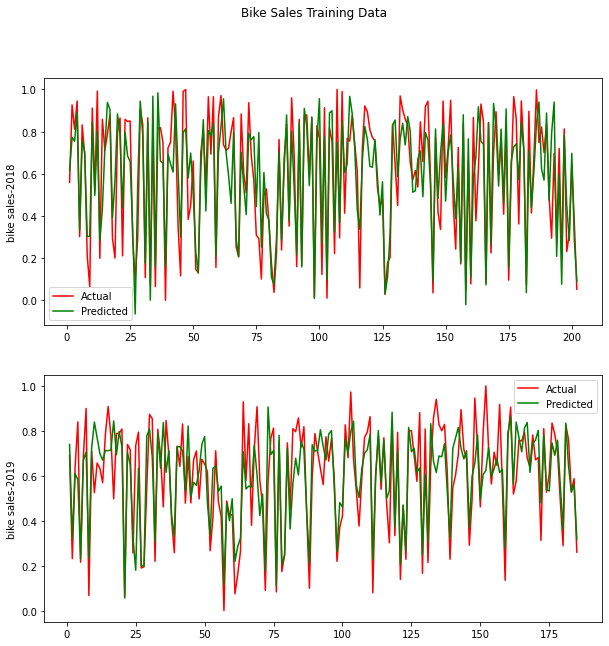

In [33]:
ybike2018_train_pred=bikemodel2018.predict(xbike2018_train_sm)
ybike2019_train_pred=bikemodel2019.predict(xbike2019_train_sm)

ybike2018_train_res=ybike2018_train-ybike2018_train_pred
ybike2019_train_res=ybike2019_train-ybike2019_train_pred

x1=range(1,len(ybike2018_train)+1)
x2=range(1,len(ybike2019_train)+1)

plt.figure(figsize=(10,4))
plt.suptitle("Bike Sales Training Residuals")
plt.subplot(1,2,1)
sbn.distplot(ybike2018_train_res).set(title="2018")
plt.subplot(1,2,2)
sbn.distplot(ybike2019_train_res).set(title="2019")

plt.figure(figsize=(10,10))
plt.suptitle("Bike Sales Training Data")
plt.subplot(2,1,1)
plt.plot(x1,ybike2018_train,c="red",label="Actual")
plt.plot(x1,ybike2018_train_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2018")
plt.legend()
plt.subplot(2,1,2)
plt.plot(x2,ybike2019_train,c="red",label="Actual")
plt.plot(x2,ybike2019_train_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2019")
plt.legend()

## Find the Prediction & R2 Score on Test data

In [34]:
bike2018_test[varcon3]=scaler2018.transform(bike2018_test[varcon3])
bike2019_test[varcon3]=scaler2019.transform(bike2019_test[varcon3])

ybike2018_test=bike2018_test.pop("cnt")
ybike2019_test=bike2019_test.pop("cnt")

xbike2018_test=bike2018_test
xbike2019_test=bike2019_test

xbike2018_test_sm=sm.add_constant(xbike2018_test)
xbike2019_test_sm=sm.add_constant(xbike2019_test)

ybike2018_test_pred=bikemodel2018.predict(xbike2018_test_sm)
ybike2019_test_pred=bikemodel2019.predict(xbike2019_test_sm)

a=r2_score(y_true=ybike2018_test,y_pred=ybike2018_test_pred)
b=r2_score(y_true=ybike2019_test,y_pred=ybike2019_test_pred)

print("\tR2 Score-2018\t",round(a,2),"\n","\tR2-Score-2019\t",round(b,2))

	R2 Score-2018	 0.77 
 	R2-Score-2019	 0.55


## Plot the test prediction

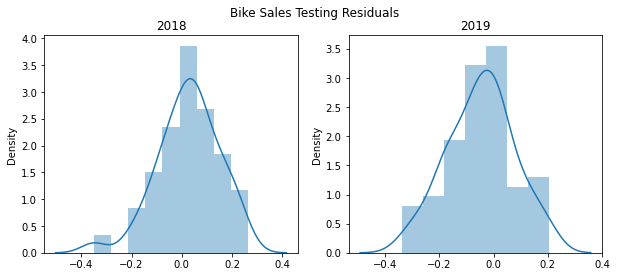

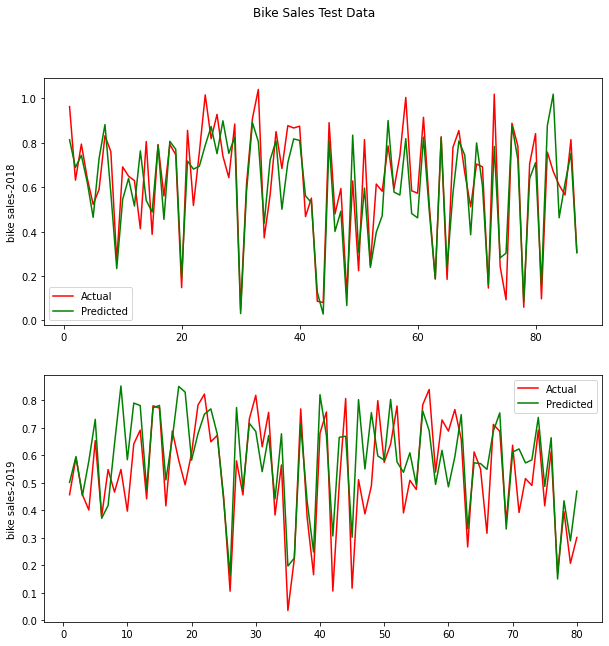

In [35]:
ybike2018_test_res=ybike2018_test-ybike2018_test_pred
ybike2019_test_res=ybike2019_test-ybike2019_test_pred

x1=range(1,len(ybike2018_test)+1)
x2=range(1,len(ybike2019_test)+1)

plt.figure(figsize=(10,4))
plt.suptitle("Bike Sales Testing Residuals")
plt.subplot(1,2,1)
sbn.distplot(ybike2018_test_res).set(title="2018")
plt.subplot(1,2,2)
sbn.distplot(ybike2019_test_res).set(title="2019")

plt.figure(figsize=(10,10))
plt.suptitle("Bike Sales Test Data")
plt.subplot(2,1,1)
plt.plot(x1,ybike2018_test,c="red",label="Actual")
plt.plot(x1,ybike2018_test_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2018")
plt.legend()
plt.subplot(2,1,2)
plt.plot(x2,ybike2019_test,c="red",label="Actual")
plt.plot(x2,ybike2019_test_pred,c="green",label="Predicted")
plt.ylabel("bike sales-2019")
plt.legend()